In [1]:
import matplotlib.pyplot as plt

from data_access.iris import load_iris_data
from utils.data_transformation import binarize_class_labels
from neurons.perceptron import Perceptron
from plots.raw_data import classes_scatter_plot
from plots.learning_results import plot_2d_decision_boundary, plot_error_history

In [2]:
iris_df = load_iris_data()

In [3]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


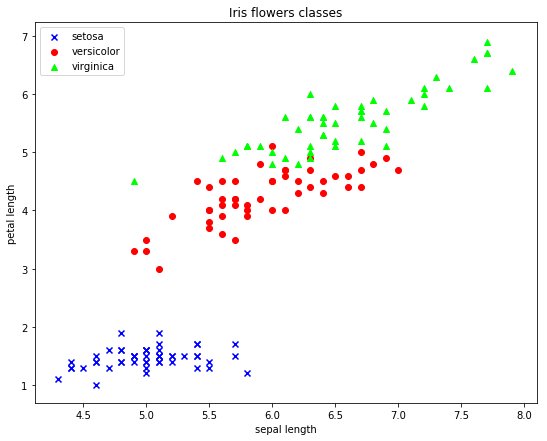

In [4]:
plt.figure(figsize=(9, 7))
classes_scatter_plot(iris_df)

In [5]:
setosa_versicolor = ["Iris-setosa", "Iris-versicolor"]

In [6]:
set_ver_df = iris_df[iris_df["class"].isin(setosa_versicolor)].copy()
set_ver_df = binarize_class_labels(set_ver_df)

In [7]:
predictor_columns = ["sepal length", "petal length"]

In [8]:
train_X = set_ver_df[predictor_columns].values
train_y = set_ver_df["binary class"].values

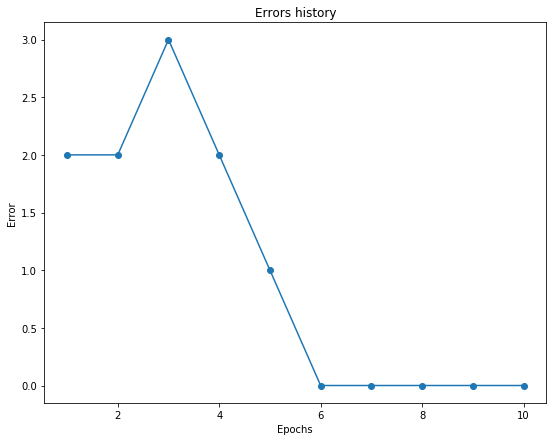

In [9]:
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(train_X, train_y)

error_plot_settings = {
    "title": "Errors history",
    "xlabel": "Epochs",
    "ylabel": "Error"
}

plt.figure(figsize=(9, 7))
plot_error_history(perceptron.errors_history_, error_plot_settings)

In [10]:
print('b:', perceptron.b_)
print('w:', perceptron.w_)

b: -0.4
w: [-0.68  1.82]


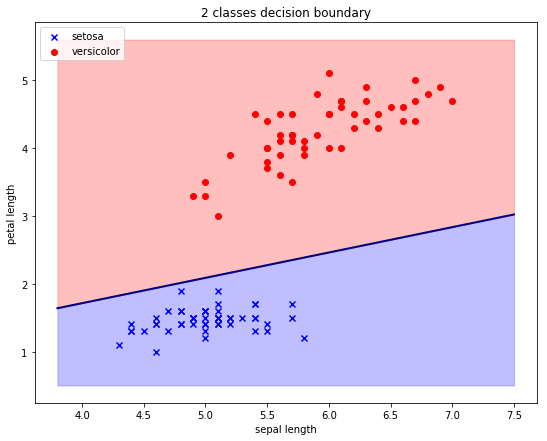

In [11]:
plt.figure(figsize=(9, 7))
plot_2d_decision_boundary(set_ver_df, perceptron)